# Data Cleaning

In [1]:
# 1. Load Dataset

import pandas as pd
import nltk
import re
from nltk.corpus import stopwords

In [2]:
# Download stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ptaru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("amazonreviews.tsv", sep="\t")

In [4]:
print("Original Shape:", df.shape)

Original Shape: (10000, 2)


In [5]:
# 2. Remove Duplicates

df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (10000, 2)


In [6]:
# 3. Handle Missing Values

df = df.dropna(subset=["review"])    # remove rows with missing review text
print("After dropping missing review rows:", df.shape)

After dropping missing review rows: (10000, 2)


In [7]:
# 4. Text Preprocessing

# (Lowercasing, Removing Special Characters, Removing Stopwords)
def preprocess_text(text):
    text = text.lower()                                # lowercase
    text = re.sub(r"[^a-zA-Z ]", "", text)             # remove numbers & special chars
    words = text.split()                               # tokenization
    words = [w for w in words if w not in stop_words]  # stopword removal
    return " ".join(words)

In [8]:
df["cleaned_review"] = df["review"].apply(preprocess_text)

In [9]:
# 5. Display sample cleaned text

print("\nSample cleaned review:")
print(df["cleaned_review"].iloc[0])


Sample cleaned review:
stuning even nongamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen


# Exploratory Analysis

In [10]:
# EXPLORATORY ANALYSIS
# Wordclouds • Sentiment Distribution • Common Words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

C:\Users\ptaru\AppData\Local\Temp\ipykernel_26108\4287469170.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette="viridis")


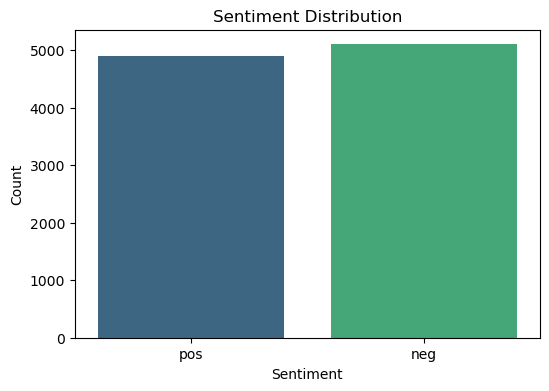

In [11]:
# 1. Sentiment Distribution

plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

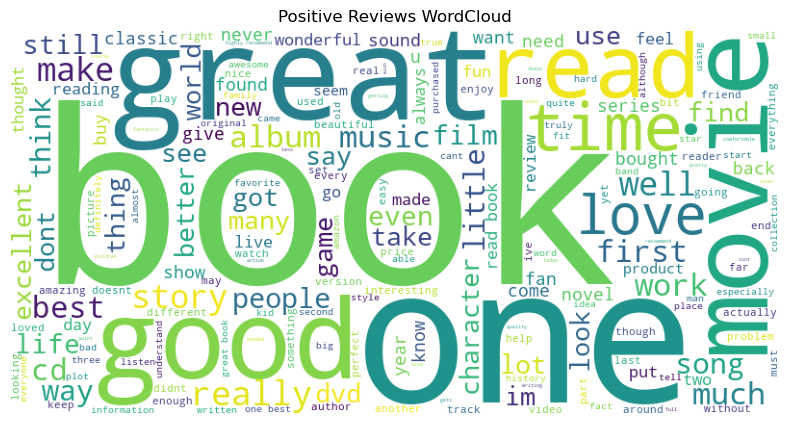

In [12]:
# 2. Word Cloud for Positive Reviews

positive_text = " ".join(df[df['label'] == 'pos']['cleaned_review'])

plt.figure(figsize=(10,5))
wc_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.imshow(wc_pos)
plt.axis("off")
plt.title("Positive Reviews WordCloud")
plt.show()

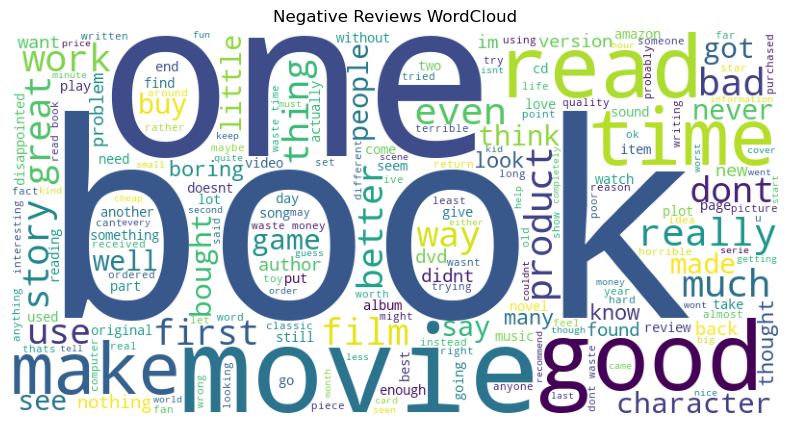

In [13]:
# 3. Word Cloud for Negative Reviews

negative_text = " ".join(df[df['label'] == 'neg']['cleaned_review'])

plt.figure(figsize=(10,5))
wc_neg = WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.imshow(wc_neg)
plt.axis("off")
plt.title("Negative Reviews WordCloud")
plt.show()


In [14]:
# 4. Most Common Words (Positive + Negative)

def get_top_words(text, n=20):
    words = text.split()
    counter = Counter(words)
    return counter.most_common(n)

In [15]:
# Top 20 positive words

top_pos = get_top_words(positive_text, 20)
print("\nTop 20 Positive Words:")
for word, count in top_pos:
    print(f"{word}: {count}")


Top 20 Positive Words:
book: 3313
great: 2087
one: 1835
good: 1635
read: 1553
like: 1268
movie: 1085
would: 943
love: 902
time: 871
well: 854
really: 827
best: 801
get: 793
story: 713
first: 708
much: 650
cd: 581
music: 559
also: 557


In [16]:
# Top 20 negative words

top_neg = get_top_words(negative_text, 20)
print("\nTop 20 Negative Words:")
for word, count in top_neg:
    print(f"{word}: {count}")


Top 20 Negative Words:
book: 3184
one: 2022
like: 1547
movie: 1465
would: 1438
dont: 1240
read: 1187
get: 1139
good: 1134
time: 1034
even: 898
buy: 814
really: 778
much: 769
bad: 749
money: 744
first: 736
could: 658
better: 656
great: 632


In [17]:
# Bar plots for top words

pos_words, pos_counts = zip(*top_pos)
neg_words, neg_counts = zip(*top_neg)

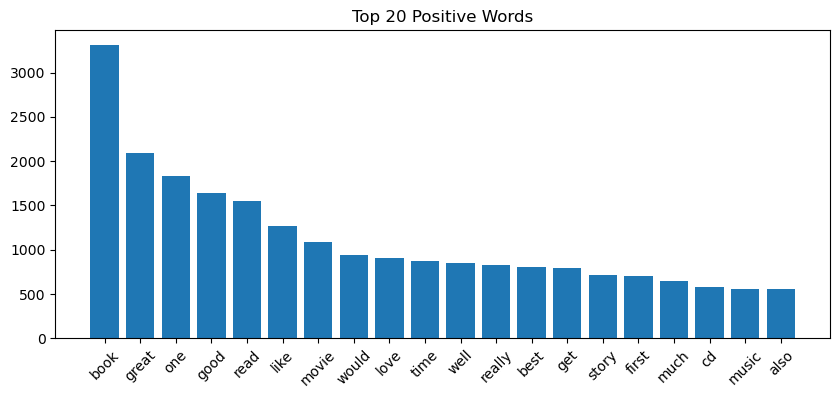

In [18]:
plt.figure(figsize=(10,4))
plt.bar(pos_words, pos_counts)
plt.title("Top 20 Positive Words")
plt.xticks(rotation=45)
plt.show()

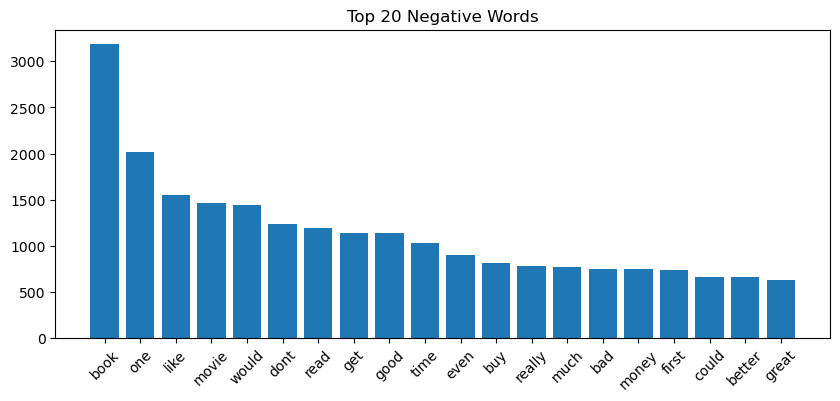

In [19]:
plt.figure(figsize=(10,4))
plt.bar(neg_words, neg_counts)
plt.title("Top 20 Negative Words")
plt.xticks(rotation=45)
plt.show()

# Model Development

In [20]:
# TF-IDF + Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['cleaned_review'])
y = df['label']

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [24]:
# Predictions

y_pred_lr = lr_model.predict(X_test)

In [25]:
print("\n--- TF-IDF + Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


--- TF-IDF + Logistic Regression Results ---
Accuracy: 0.853
              precision    recall  f1-score   support

         neg       0.85      0.86      0.86      1019
         pos       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [26]:
# pip install gensim

In [27]:
# !pip install gensim

In [28]:
# Word2Vec + SVM

import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.svm import SVC

In [29]:
# Prepare text for Word2Vec
sentences = [row.split() for row in df['cleaned_review']]

In [30]:
# Train Word2Vec
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [31]:
# Function to convert each review into vector (average of word embeddings)
def get_vector(sentence):
    words = sentence.split()
    words = [w for w in words if w in w2v_model.wv]
    if len(words) == 0:
        return np.zeros(100)
    return np.mean(w2v_model.wv[words], axis=0)

In [32]:
X_w2v = np.array([get_vector(text) for text in df['cleaned_review']])
y = df['label']

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_w2v, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
# SVM Classifier
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
y_pred_svm = svm_model.predict(X_test)

In [36]:
print("\n--- Word2Vec + SVM Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


--- Word2Vec + SVM Results ---
Accuracy: 0.7605
              precision    recall  f1-score   support

         neg       0.75      0.79      0.77      1019
         pos       0.77      0.73      0.75       981

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



BERT Embeddings + Neural Network

In [37]:
# !pip install sentence-transformers

In [38]:
# pip install tf-keras

In [39]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [40]:
# Load pretrained BERT model

bert = SentenceTransformer('all-MiniLM-L6-v2')  # Fast & accurate

In [41]:
# Convert reviews into BERT embeddings

X_bert = bert.encode(df['cleaned_review'], show_progress_bar=True)
y = df['label']

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [43]:
# Encode labels (pos->1, neg->0)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [44]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X_bert, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [45]:
# Build simple neural network

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_bert.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\ptaru\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# Train model

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7816 - loss: 0.4659 - val_accuracy: 0.8269 - val_loss: 0.3968
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8350 - loss: 0.3678 - val_accuracy: 0.8319 - val_loss: 0.3960
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8533 - loss: 0.3375 - val_accuracy: 0.8263 - val_loss: 0.4028
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8617 - loss: 0.3135 - val_accuracy: 0.8363 - val_loss: 0.3812
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8831 - loss: 0.2886 - val_accuracy: 0.8288 - val_loss: 0.4121


In [48]:
# Evaluation

loss, acc = model.evaluate(X_test, y_test)
print("\n--- BERT + Neural Network Results ---")
print("Accuracy:", acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8395 - loss: 0.4068   

--- BERT + Neural Network Results ---
Accuracy: 0.8395000100135803


# Validation

In [49]:
# VALIDATION: Train/Test Split + Cross-Validation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
# 1. TF-IDF Vectorization

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])
y = df['label']

In [51]:
# 2. Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [52]:
# 3. Train Model (Logistic Regression)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [53]:
# 4. Predictions on Test Set

y_pred = model.predict(X_test)

In [54]:
# 5. Evaluation Metrics

print("\n--- Test Set Evaluation ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='pos'))
print("Recall   :", recall_score(y_test, y_pred, pos_label='pos'))
print("F1-score :", f1_score(y_test, y_pred, pos_label='pos'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


--- Test Set Evaluation ---
Accuracy : 0.853
Precision: 0.8530318602261048
Recall   : 0.8460754332313966
F1-score : 0.849539406345957

Classification Report:

              precision    recall  f1-score   support

         neg       0.85      0.86      0.86      1019
         pos       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [55]:
# 6. Cross-Validation (5-fold)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1_macro')

In [56]:
print("\n--- Cross-Validation Results (5-fold) ---")
print("Accuracy Scores:", cv_scores)
print("Mean Accuracy  :", cv_scores.mean())
print("\nF1 Scores:", cv_f1)
print("Mean F1 Score :", cv_f1.mean())


--- Cross-Validation Results (5-fold) ---
Accuracy Scores: [0.859  0.834  0.829  0.8295 0.85  ]
Mean Accuracy  : 0.8403

F1 Scores: [0.85898294 0.83389619 0.82876558 0.8294928  0.8499904 ]
Mean F1 Score : 0.8402255795172779
